In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import pysis
import warnings

C:\Users\lucas\anaconda3\lib\site-packages\pysis\env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)


In [3]:
df_0405 = pd.read_csv('boxC/boxC_0405_refined.csv')
df_0607 = pd.read_csv('boxA/boxA_0607_refined.csv')
df_0809 = pd.read_csv('boxD/boxD_0809.csv')
df_1011 = pd.read_csv('boxA/boxA_1011.csv')
df_1213 = pd.read_csv('boxD/boxD_1213.csv')
df_1415 = pd.read_csv('boxE/boxE_1415.csv')
df_1617 = pd.read_csv('boxC/boxC_1617.csv')

vims_wave = np.loadtxt('vims_wave.txt')

In [4]:
%%capture --no-display
for df in (df_0405,df_0607,df_0809,df_1011,df_1213,df_1415,df_1617):
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

In [5]:
spectra_0405 = np.average(np.asarray(df_0405['spectrum']))
spectra_0607 = np.average(np.asarray(df_0607['spectrum']))
spectra_0809 = np.average(np.asarray(df_0809['spectrum']))
spectra_1011 = np.average(np.asarray(df_1011['spectrum']))
spectra_1213 = np.average(np.asarray(df_1213['spectrum']))
spectra_1415 = np.average(np.asarray(df_1415['spectrum']))
spectra_1617 = np.average(np.asarray(df_1617['spectrum']))

In [6]:
spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

## Fitting third degree curve to spectra (dependent on what variable is inserted as a spectra)

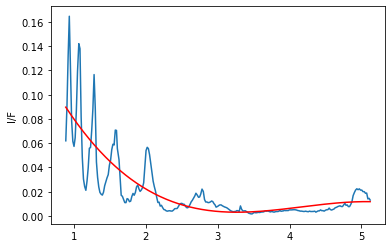

In [18]:
%matplotlib inline
x = vims_wave
y = spectra_0607
p = np.polyval(np.polyfit(x,y,3),x)
plt.plot(x,y)
plt.plot(x,p,c='r')
plt.ylabel('I/F')
plt.show()

## Finding how many negative values are in each spectra

In [8]:
for spectra in spectra_list:
    k = 0
    for number in spectra:
        if number <= 0:
            k += 1
    print(k)
    
## only spectra_0405 & spectra_0607 contain negative values

150
0
128
0
0
0
0
